# Web pages classification
## A machine learning and data mining task
* Data: http://www.cs.cmu.edu/afs/cs/project/theo-20/www/data/

### UFSC - DAS - MACHINE LEARNING - JOMI FRED HUBNER
* Authors: Luis Felipe Pelison, Alex Cani and Iago Oliveira
 
 ** Helped by: https://github.com/justmarkham/pycon-2016-tutorial/blob/master/tutorial_with_output.ipynb

## 1. Importing data and python libraries

In [2]:
# -*- encoding: utf-8 -*-
import pandas as pd
import os
import os.path
import re
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Para que os graficos apareçam
%matplotlib inline

### Python script to put data on a csv file

In [3]:
urls = []

for dirpath, dirnames, filenames in os.walk("./webkb"):
    for filename in filenames:
        urls.append(os.path.join(dirpath, filename))

print len(urls)

regex = r"\<([\s\S]*)>"

with open('corpus.csv', 'w') as output:
    for j, i in enumerate(urls):
        with open(i) as input:
            if j == 0:
                output.write("url-||-university-||-html-||-target \n")
            search = re.search(regex, input.read())
            if search: 
                html = search.group(0).replace('\n', ' ').replace('\r', '')
            else:
                html = 'NaN'
            target = i.split("/")[2]
            university = i.split("/")[3]
            url = i.split("/")[4]
            #print j
            output.write("{0}-||-{1}-||-{2}-||-{3} \n".format(url, university, html, target))


8282


### CSV to PANDAS

In [5]:
#one = pd.read_html
path = './corpus.csv'
one = pd.read_csv(path, sep=r"\-\|\|-", quotechar='"', engine='python')
%time

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 5.96 µs


In [6]:
one.head()

,url,university,html,target
0,http:^^www.cs.utexas.edu^users^less^,texas,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 3.2//E...",project
1,http:^^www.cs.utexas.edu^users^vlr^sac.html,texas,<title>UT Algorithms and Computational Theory ...,project
2,http:^^www.cs.utexas.edu^users^lam^NRL^,texas,"<title> Networking Research Laboratory, UT-Aus...",project
3,http:^^www.cs.utexas.edu^users^cad^cad.html,texas,<title> UTCS CAD Home page </title> <h1> CAD ...,project
4,http:^^www.cs.utexas.edu^users^ai-lab^,texas,<title>UT Artificial Intelligence Laboratory</...,project


### Looking the data

In [7]:
one.describe()

,url,university,html,target
count,8282,8282,8265,8282
unique,8275,5,8240,7
top,http:^^www.cs.columbia.edu^~simonb^,misc,<html> <HEAD> <TITLE>Department of Computer Sc...,other
freq,2,4120,2,3764


## Data Website :
http://www.cs.cmu.edu/afs/cs/project/theo-20/www/data/

### Number of data by universities

* Cornell - 867
* Misc - 4120
* Texas - 827
* Washington - 1205
* Wisconsin - 1263

** sum ** = 8282


In [8]:
one.groupby(one['university']).count()

,url,html,target
university,,,
cornell,867,867,867
misc,4120,4104,4120
texas,827,827,827
washington,1205,1205,1205
wisconsin,1263,1262,1263


### Number of data by target class

* course - (930)
* department - (182)
* faculty - (1124)
* other - (3764)
* project - (504)
* staff - (137)
* student - (1641)

** sum ** = 8282

In [9]:
one.groupby(one['target']).count()

,url,university,html
target,,,
course,930,930,930
department,182,182,182
faculty,1124,1124,1124
other,3764,3764,3747
project,504,504,504
staff,137,137,137
student,1641,1641,1641


### Some html are 'NaN'.

* Let's delete them.


In [10]:
# Who is 'Nan'?

one[one['html'].isnull()]

,url,university,html,target
4047,http:^^www.cs.wisc.edu^~cs354-2^cs354^solution...,wisconsin,NaN,other
6549,http:^^wizard.cse.nd.edu^class_data^cse542^www...,misc,NaN,other
6575,http:^^www.cs.clemson.edu^~peck^vitae^peck,misc,NaN,other
6576,http:^^simulation.modsim.nyu.edu^cvcourse^logi...,misc,NaN,other
6588,http:^^www.cs.clemson.edu^~madhu^usa.txt,misc,NaN,other
6624,http:^^www.cis.ksu.edu^~singh^CIS725^olec10,misc,NaN,other
6629,http:^^www.cis.upenn.edu^~lee^cse480^480^Lec2.rpc,misc,NaN,other
6637,http:^^www.cis.upenn.edu^~lee^cse480^480^lec03...,misc,NaN,other
6656,http:^^www.columbia.edu^~cs1003^handouts^rfc1135,misc,NaN,other
6730,http:^^cs.nyu.edu^cs^dept_info^course_home_pag...,misc,NaN,other


In [11]:
# Deleting rows with null values. There are 17 rows.

one = one.dropna(axis=0, how='any')
#one[one['html'].isnull()]
one.describe()

,url,university,html,target
count,8265,8265,8265,8265
unique,8258,5,8240,7
top,http:^^www.cs.columbia.edu^~tboult^,misc,<html> <HEAD> <TITLE>Department of Computer Sc...,other
freq,2,4104,2,3747


## 2.  Data Visualization

#### Number of data by universities

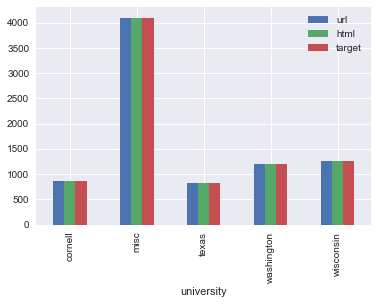

In [10]:
one.groupby(['university']).count().plot.bar();

#### Number of data by target class

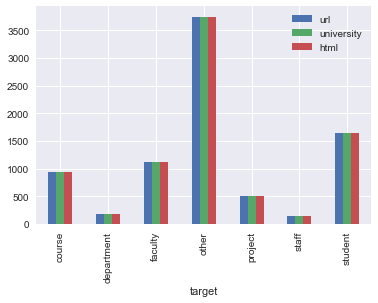

In [11]:
one.groupby(['target']).count().plot.bar();

In [12]:
one.groupby(['university','target'])['url'].count()

university  target    
cornell     course          44
            department       1
            faculty         34
            other          619
            project         20
            staff           21
            student        128
misc        course         686
            department     178
            faculty        971
            other          677
            project        418
            staff           91
            student       1083
texas       course          38
            department       1
            faculty         46
            other          571
            project         20
            staff            3
            student        148
washington  course          77
            department       1
            faculty         31
            other          939
            project         21
            staff           10
            student        126
wisconsin   course          85
            department       1
            faculty         42
            othe

#### Data by university AND target class

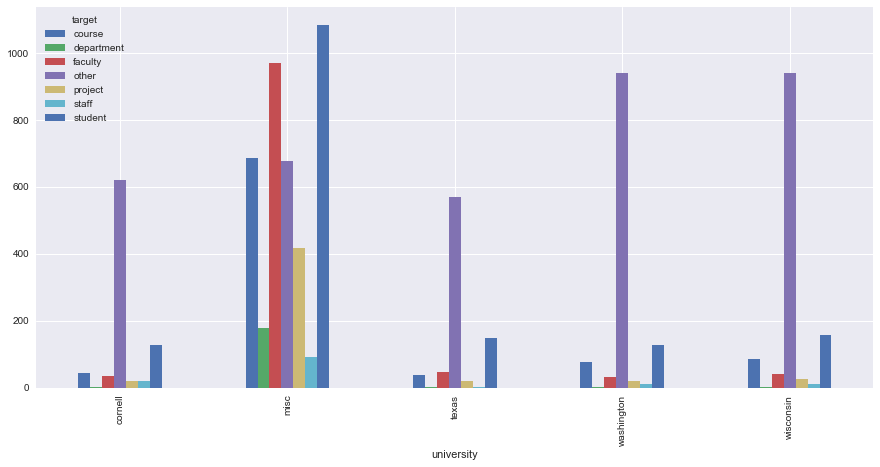

In [13]:
temp = pd.crosstab(one['university'], one['target'])
temp.plot(kind='bar', stacked=False, grid=True, figsize=(15,7));

## 3. Machine Learning Models

#### Remembering the data

In [14]:
one.head()

,url,university,html,target
0,http:^^www.cs.utexas.edu^users^less^,texas,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 3.2//E...",project
1,http:^^www.cs.utexas.edu^users^vlr^sac.html,texas,<title>UT Algorithms and Computational Theory ...,project
2,http:^^www.cs.utexas.edu^users^lam^NRL^,texas,"<title> Networking Research Laboratory, UT-Aus...",project
3,http:^^www.cs.utexas.edu^users^cad^cad.html,texas,<title> UTCS CAD Home page </title> <h1> CAD ...,project
4,http:^^www.cs.utexas.edu^users^ai-lab^,texas,<title>UT Artificial Intelligence Laboratory</...,project


In [15]:
one.groupby(['target']).count()

,url,university,html
target,,,
course,930,930,930
department,182,182,182
faculty,1124,1124,1124
other,3747,3747,3747
project,504,504,504
staff,137,137,137
student,1641,1641,1641


#### Create a new column with numeric values to the target

In [16]:
one['target_num'] = one.target.map({'course':0, 'department':1, 'faculty':2, 'other':3, 'project':4, 'staff':5, 'student':6})


#### HTML data

In [17]:
# Define X and y (from the data) for use with COUNTVECTORIZER

X = one.html
y = one.target_num
print(X.shape)
print(y.shape)

(8265,)
(8265,)


#### Split into training and testing sets

In [111]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6198,)
(2067,)
(6198,)
(2067,)


#### Vectorizing

In [112]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# instantiate the vectorizer

vect = CountVectorizer(encoding='latin-1', stop_words='english', ngram_range=(1, 2), min_df=5)
#vect = TfidfVectorizer(encoding='latin-1', stop_words='english', ngram_range=(1, 2), min_df=5)
# Esse tfIdf deu ruim

                       
# combine fit and transform into a single step

X_train_dtm = vect.fit_transform(X_train)
X_train_dtm

<6198x61560 sparse matrix of type '<type 'numpy.int64'>'
	with 1933397 stored elements in Compressed Sparse Row format>

In [113]:
# transform testing data (using fitted vocabulary) into a document-term matrix

X_test_dtm = vect.transform(X_test)
X_test_dtm

<2067x61560 sparse matrix of type '<type 'numpy.int64'>'
	with 608592 stored elements in Compressed Sparse Row format>

### Comparing models

#### Naive Bayes

In [114]:
# import and instantiate a Multinomial Naive Bayes model

from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [115]:
# train the model using X_train_dtm (timing it with an IPython "magic command")

%time nb.fit(X_train_dtm, y_train)

CPU times: user 64 ms, sys: 0 ns, total: 64 ms
Wall time: 63.9 ms


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [116]:
# make class predictions for X_test_dtm

y_pred_class = nb.predict(X_test_dtm)


# calculate accuracy of class predictions

from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.6032897919690372

#### Logistic Regression

In [117]:
# import and instantiate a logistic regression model

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(class_weight='balanced')

# train the model using X_train_dtm

%time logreg.fit(X_train_dtm, y_train)

CPU times: user 1min 51s, sys: 3min 27s, total: 5min 19s
Wall time: 1min 26s


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [118]:
# make class predictions for X_test_dtm

y_pred_class = logreg.predict(X_test_dtm)


# calculate accuracy

metrics.accuracy_score(y_test, y_pred_class)

0.83502660861151423

In [119]:
# print the confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)

array([[178,   0,   4,  32,   0,   0,   3],
       [  1,  26,   6,   6,   2,   0,   2],
       [  4,   1, 223,  24,   5,   0,  17],
       [ 30,  10,  15, 854,  25,   4,  39],
       [  0,   0,   8,  19,  81,   0,   5],
       [  0,   0,   6,   2,   0,   7,  11],
       [  1,   0,   4,  50,   3,   2, 357]])

In [120]:
one.groupby(['target_num', 'target']).count()

,,url,university,html
target_num,target,,,
0,course,930,930,930
1,department,182,182,182
2,faculty,1124,1124,1124
3,other,3747,3747,3747
4,project,504,504,504
5,staff,137,137,137
6,student,1641,1641,1641


#### Random Forest

In [121]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=300)

%time forest.fit(X_train_dtm, y_train)

CPU times: user 1min 20s, sys: 16 ms, total: 1min 20s
Wall time: 1min 20s


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=300, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [122]:

y_pred_class = forest.predict(X_test_dtm)

metrics.accuracy_score(y_test, y_pred_class)

0.81083696178035802

#### Gradient Boosting - NOT RUN!

In [32]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100,learning_rate=1.0,max_depth=1,random_state=0)

%time clf.fit(X_train_dtm, y_train)

CPU times: user 59.1 s, sys: 0 ns, total: 59.1 s
Wall time: 59.1 s


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1.0, loss='deviance', max_depth=1,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=0,
              subsample=1.0, verbose=0, warm_start=False)

In [33]:
%time X_test_array = X_test_dtm.toarray()

CPU times: user 88 ms, sys: 472 ms, total: 560 ms
Wall time: 23.2 s


In [34]:
# NAO RODAR! LERDO
y_pred_class = clf.predict(X_test_array)

metrics.accuracy_score(y_test, y_pred_class)

0.78644888082274655

## 4. Examining tokenization

In [123]:
# store the vocabulary of X_train

X_train_tokens = vect.get_feature_names()
len(X_train_tokens)

61560

In [124]:
# examine the first 50 tokens
print(X_train_tokens[0:50])

[u'00', u'00 00', u'00 00pm', u'00 10', u'00 11', u'00 12', u'00 15', u'00 1996', u'00 20', u'00 30', u'00 45', u'00 50', u'00 appointment', u'00 br', u'00 dd', u'00 em', u'00 files', u'00 gmt', u'00 li', u'00 noon', u'00 pm', u'00 pre', u'00 room', u'00 states', u'00 tay', u'00 td', u'00 th', u'00 thursday', u'00 tuesday', u'00 ul', u'00 wednesday', u'000', u'000 000', u'000 lines', u'000 people', u'0000', u'0000 html', u'00000', u'00000 table', u'000000', u'000000 alink', u'000000 background', u'000000 bgcolor', u'000000 body', u'000000 center', u'000000 font', u'000000 h1', u'000000 h2', u'000000 head', u'000000 link']


In [125]:
# examine the last 50 tokens
print X_train_tokens[-50:]

[u'zhen', u'zheng', u'zhichen', u'zhong', u'zhongda', u'zhongshan', u'zhongshan university', u'zhou', u'zhou ul', u'zhu', u'zhu qing', u'zhuqing', u'ziff', u'ziff com', u'ziff davis', u'ziggy', u'zimmermann', u'zines', u'zip', u'zip code', u'zippel', u'zippy', u'zone', u'zone dt', u'zone li', u'zongker', u'zoo', u'zoo cs', u'zoology', u'zoom', u'zoomed', u'zooming', u'zorn', u'zou', u'zpl', u'zpl compiler', u'zpl footer', u'zpl images', u'zpl info', u'zpl language', u'zpl logo', u'zpl papers', u'zpl zpl', u'zsu', u'zuckerman', u'zurich', u'zurich switzerland', u'zvi', u'zwaenepoel', u'zwilling']


In [126]:
# Naive Bayes counts the number of times each token appears in each class
nb.feature_count_

array([[ 745.,  145.,   41., ...,    0.,    0.,    0.],
       [  12.,    1.,    0., ...,    0.,    0.,    0.],
       [ 140.,   32.,    1., ...,    7.,    4.,    2.],
       ..., 
       [  26.,    2.,    0., ...,    1.,    2.,    2.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.],
       [ 135.,   17.,    2., ...,    6.,    9.,    1.]])

In [127]:
nb.feature_count_.shape

(7, 61560)

In [128]:
# number of times each token appears across all course
course_token_count = nb.feature_count_[0, :]
course_token_count

# number of times each token appears across all department
department_token_count = nb.feature_count_[1, :]
department_token_count

# number of times each token appears across all faculty
faculty_token_count = nb.feature_count_[2, :]
faculty_token_count

# number of times each token appears across all other
other_token_count = nb.feature_count_[3, :]
other_token_count

# number of times each token appears across all project
project_token_count = nb.feature_count_[4, :]
project_token_count

# number of times each token appears across all staff
staff_token_count = nb.feature_count_[5, :]
staff_token_count

# number of times each token appears across all student
student_token_count = nb.feature_count_[6, :]
student_token_count

array([ 135.,   17.,    2., ...,    6.,    9.,    1.])

In [129]:
# create a DataFrame of tokens with their separate target counts
tokens = pd.DataFrame({'token':X_train_tokens, 'course':course_token_count, 'department':department_token_count, 'faculty':faculty_token_count, 'other':other_token_count, 'project':project_token_count, 'staff':staff_token_count, 'student':student_token_count}).set_index('token')
tokens[:50]

,course,department,faculty,other,project,staff,student
token,,,,,,,
00,745.0,12.0,140.0,6378.0,26.0,0.0,135.0
00 00,145.0,1.0,32.0,2002.0,2.0,0.0,17.0
00 00pm,41.0,0.0,1.0,15.0,0.0,0.0,2.0
00 10,20.0,0.0,0.0,23.0,0.0,0.0,3.0
00 11,58.0,0.0,6.0,28.0,0.0,0.0,5.0
00 12,56.0,0.0,6.0,21.0,0.0,0.0,6.0
00 15,16.0,0.0,1.0,6.0,0.0,0.0,2.0
00 1996,7.0,0.0,1.0,2.0,1.0,0.0,1.0
00 20,4.0,0.0,4.0,18.0,0.0,0.0,0.0


In [130]:
# examine 5 random DataFrame rows
tokens.sample(8, random_state=10)

,course,department,faculty,other,project,staff,student
token,,,,,,,
panix,0.0,0.0,1.0,10.0,0.0,0.0,3.0
carter,25.0,0.0,10.0,37.0,2.0,0.0,18.0
dist,19.0,0.0,11.0,20.0,11.0,1.0,8.0
systems allow,0.0,0.0,2.0,4.0,1.0,0.0,0.0
symposium reliable,0.0,0.0,2.0,2.0,0.0,0.0,3.0
bo,0.0,0.0,2.0,5.0,0.0,0.0,2.0
homepage br,5.0,0.0,0.0,16.0,0.0,0.0,17.0
dennis lee,0.0,0.0,2.0,1.0,2.0,0.0,3.0


# Training with an university (Wisconsin) and testing on Washington university.

In [17]:
washington = one[one.university == 'washington']
wisconsin = one[one.university == 'wisconsin']

In [18]:
washington.shape, wisconsin.shape

((1205, 5), (1262, 5))

In [20]:
# Define X and y (from the data) for use with COUNTVECTORIZER

#Training data

X_wisconsin = wisconsin.html
y_wisconsin = wisconsin.target_num


#Testing data

X_washington = washington.html
y_washington = washington.target_num
X_wisconsin.shape, y_wisconsin.shape, X_washington.shape, y_washington.shape

((1262,), (1262,), (1205,), (1205,))

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.feature_extraction.text import TfidfVectorizer

# instantiate the vectorizer

vect = CountVectorizer(encoding='latin-1', stop_words='english', ngram_range=(1, 2), min_df=5)
#vect = TfidfVectorizer(encoding='latin-1', stop_words='english', ngram_range=(1, 2), min_df=5)
# Esse tfIdf deu ruim

                       
# combine fit and transform into a single step

X_wisconsin_dtm = vect.fit_transform(X_wisconsin)
X_wisconsin_dtm

<1262x16768 sparse matrix of type '<type 'numpy.int64'>'
	with 375003 stored elements in Compressed Sparse Row format>

In [23]:
# transform testing data (using fitted vocabulary) into a document-term matrix

X_washington_dtm = vect.transform(X_washington)
X_washington_dtm

<1205x16768 sparse matrix of type '<type 'numpy.int64'>'
	with 245806 stored elements in Compressed Sparse Row format>

## Machine Learning

### Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

forest = RandomForestClassifier(n_estimators=300)

%time forest.fit(X_wisconsin_dtm, y_wisconsin)

y_pred_washington = forest.predict(X_washington_dtm)

metrics.accuracy_score(y_washington, y_pred_washington)

CPU times: user 3.99 s, sys: 8 ms, total: 4 s
Wall time: 3.96 s


0.7850622406639004